In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
diamonds = pd.read_csv("../Data/Diamonds Prices2022.csv").drop("Unnamed: 0", axis=1)

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#sns.FacetGrid(Dataframe, column, column wrap)

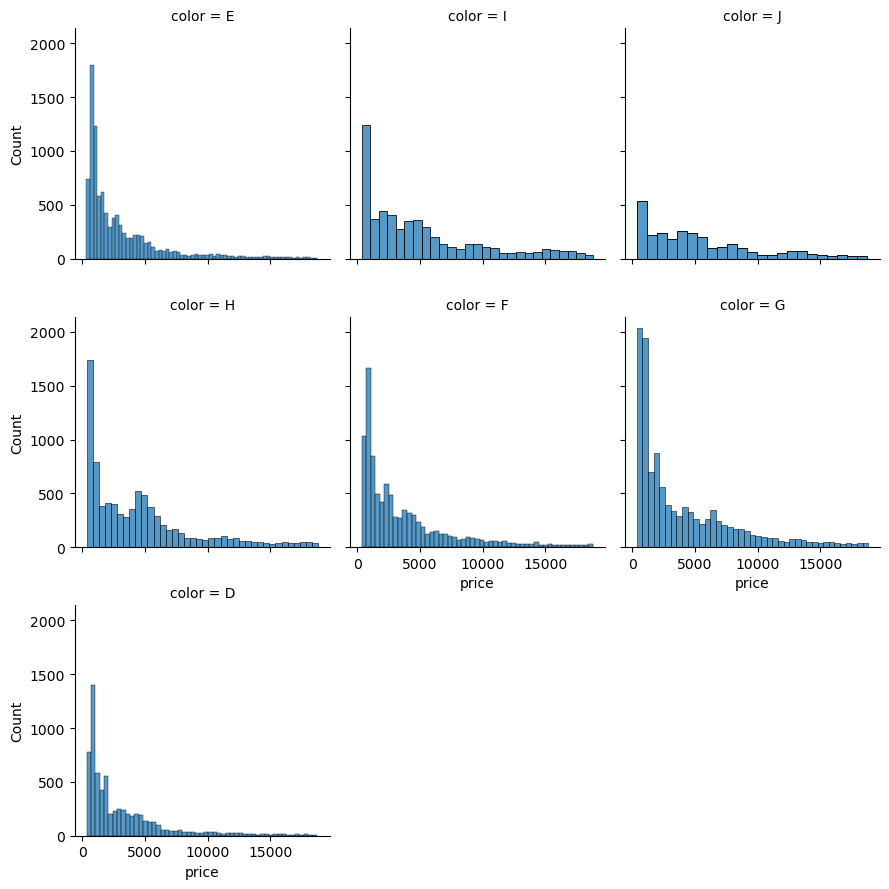

In [7]:
g = sns.FacetGrid(diamonds, col="color", col_wrap=3)

g.map_dataframe(sns.histplot, x="price")

In [11]:
housing_raw = pd.read_csv(
    "../Data/housing_data.csv",
    parse_dates=["period_begin", "period_end"],
    dtype={"total_homes_sold": "Int32", "region_name": "category"}
)

bins = np.linspace(0, 1750000, 8)
labels = ["0-250k", "250k-500k", "500k-750k", "750k-1m", "1-1.25m", "1.25m-1.5m", "1.5m+"]

ca_housing = (
    housing_raw
    .loc[(housing_raw["region_name"].str.contains("CA"))]
    .assign(
        region_name = housing_raw["region_name"].str[0:-11],
        price_bins = pd.cut(housing_raw["median_active_list_price"], 
                            bins=bins, 
                            labels=labels
                           )
    )
)


,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


In [14]:
county_list = ["Los Angeles", "San Diego", "San Francisco", "Tulare"]

ca_housing = ca_housing.loc[ca_housing["region_name"].isin(county_list)]

ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply,price_bins
883,Tulare,2019-07-08,2019-09-29,998,94.0,101.0,51.5,275036.4,1.247401,250k-500k
889,Los Angeles,2018-08-20,2018-11-11,16015,20026.0,21675.0,51.9,694662.5,16.528985,500k-750k
2365,Tulare,2022-02-14,2022-05-08,1029,320.0,367.0,28.7,382726.4,4.220507,250k-500k
3773,Los Angeles,2017-12-25,2018-03-18,13596,13817.0,15251.0,51.3,664516.6,13.834214,500k-750k
3802,Tulare,2021-10-11,2022-01-02,952,83.0,90.0,50.5,358812.5,1.160690,250k-500k


In [13]:
np.linspace(0, 1750000, 8)

array([      0.,  250000.,  500000.,  750000., 1000000., 1250000.,
       1500000., 1750000.])

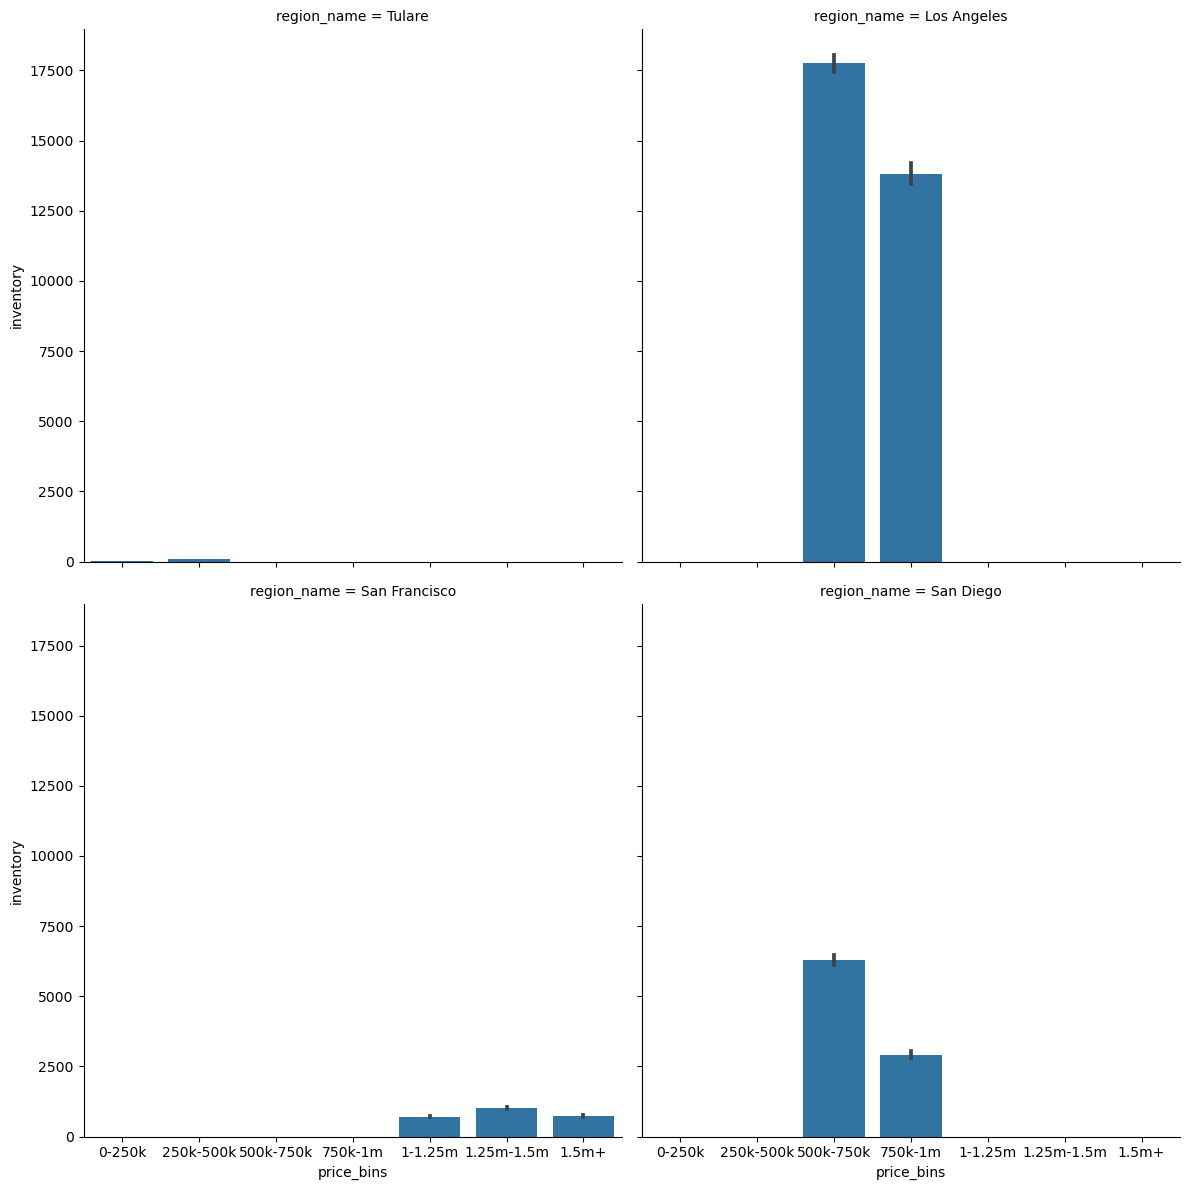

In [17]:
g = sns.FacetGrid(
    ca_housing, 
    col="region_name", 
    col_wrap=2,
    height=6,
)

g.map_dataframe(sns.barplot, x="price_bins", y="inventory")